# Module tests

In [41]:
import json

# terminal optimization package
from  terminal_optimization.core import vessel_properties_mixin, cyclic_properties_mixin, continuous_properties_mixin

## Create necessary classes using mixins

In [42]:
# create vessel class
class vessel(vessel_properties_mixin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

In [43]:
# create unloader class
class cyclic_unloader(cyclic_properties_mixin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

In [44]:
# create unloader class
class continuous_unloader(continuous_properties_mixin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

## Instantiate classes

In [45]:
# create JSONs with inputs. 
handysize_data = {"vessel_type": 'Handysize', "call_size": 35000, 
                  "LOA": 130, "draft": 10, "beam": 24, "max_cranes": 2, 
                  "all_turn_time": 24, "mooring_time": 3, "demurrage": 600} 
handymax_data = {"vessel_type": 'Handymax', "call_size": 50000, 
                  "LOA": 180, "draft": 11.5, "beam": 28, "max_cranes": 2, 
                  "all_turn_time": 24, "mooring_time": 3, "demurrage": 750} 
panamax_data = {"vessel_type": 'Panamax', "call_size": 65000, 
                  "LOA": 220, "draft": 13, "beam": 32.2, "max_cranes": 3, 
                  "all_turn_time": 36, "mooring_time": 4, "demurrage": 730} 

# create objects
handysize = vessel(**handysize_data)
handymax = vessel(**handymax_data)
panamax = vessel(**panamax_data)

In [46]:
#print object dicts
print(handysize.__dict__)
print(handymax.__dict__)
print(panamax.__dict__)

{'vessel_type': 'Handysize', 'call_size': 35000, 'LOA': 130, 'draft': 10, 'beam': 24, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage': 600}
{'vessel_type': 'Handymax', 'call_size': 50000, 'LOA': 180, 'draft': 11.5, 'beam': 28, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage': 750}
{'vessel_type': 'Panamax', 'call_size': 65000, 'LOA': 220, 'draft': 13, 'beam': 32.2, 'max_cranes': 3, 'all_turn_time': 36, 'mooring_time': 4, 'demurrage': 730}


In [47]:
handysize.demurrage

600

In [48]:
# create JSONs with inputs. 
gantry_crane_data   = {"unloader_type": 'Gantry crane', "lifting_capacity": 50, 
                       "hourly_cycles": 60, "eff_fact": 0.6} 
harbour_crane_data  = {"unloader_type": 'Harbour crane', "lifting_capacity": 40, 
                       "hourly_cycles": 40, "eff_fact": 0.6} 
mobile_crane_data   = {"unloader_type": 'Mobile crane', "lifting_capacity": 40, 
                       "hourly_cycles": 30, "eff_fact": 0.5} 
screw_unloader_data = {"unloader_type": 'Screw unloader', "peak_capacity": 1400, 
                       "eff_fact": 0.55} 

# create objects
gantry_crane    = cyclic_unloader(**gantry_crane_data)       
harbour_crane   = cyclic_unloader(**harbour_crane_data)       
mobile_crane    = cyclic_unloader(**mobile_crane_data)
screw_unloader  = continuous_unloader(**screw_unloader_data)

In [49]:
# print object dicts
print(gantry_crane.__dict__)
print(harbour_crane.__dict__)
print(mobile_crane.__dict__)
print(screw_unloader.__dict__)

{'unloader_type': 'Gantry crane', 'lifting_capacity': 50, 'hourly_cycles': 60, 'eff_fact': 0.6, 'payload': 35.0, 'peak_capacity': 2100.0, 'effective_capacity': 1260.0}
{'unloader_type': 'Harbour crane', 'lifting_capacity': 40, 'hourly_cycles': 40, 'eff_fact': 0.6, 'payload': 28.0, 'peak_capacity': 1120.0, 'effective_capacity': 672.0}
{'unloader_type': 'Mobile crane', 'lifting_capacity': 40, 'hourly_cycles': 30, 'eff_fact': 0.5, 'payload': 28.0, 'peak_capacity': 840.0, 'effective_capacity': 420.0}
{'unloader_type': 'Screw unloader', 'peak_capacity': 1400, 'eff_fact': 0.55, 'rated_capacity': 979.9999999999999, 'effective_capacity': 770.0000000000001}


# Basic calculation

In [152]:
# trend estimating class. Could easily be transferred to the package.

class estimate_trend:
    """trend estimate class"""

    def __init__(self, year, window, demand, rate):
        """initialization"""
        self.year = year
        self.window = window
        self.demand = demand
        self.rate = rate
        self.mu = mu
        self.sigma = sigma
        
    def linear(self, year, window, demand,  rate):
        """trend generated from constant growth rate increments"""
        years = range(self.year, self.year+window)
        demand = self.demand
        t = []
        d = []
        for year in years:
            t.append(year)
            d.append(demand)
            demand = demand*self.rate    

        return t, d
    
    def random(self, year, window, demand, rate, mu, sigma):
        """trend generated from random growth rate increments"""
        # package(s) used for probability
        import numpy as np

        years = range(self.year, self.year+window)
        demand = self.demand
        rate = self.rate
        t = []
        d = []
        for year in years:
            t.append(year)
            d.append(demand)
            
            change = np.random.normal(mu, sigma, 1000)
            rate = rate + change[0]
            
            demand = demand*rate    

        return t, d
    
    def print(self, t, d):
        """simpel print statement of estimated trend"""
        print(t)
        print(d)
        
    def plot(self, t, d):
        """simpel plot of estimated trend"""
        import matplotlib.pyplot as plt
        plt.plot(t, d, 'ro')
        plt.show()

[2018, 2019]
[10, 10.5]


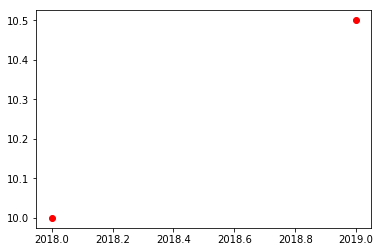

In [153]:
year = 2018 # starting year
window = 2  # looking 2 years ahead
demand = 10 # demand at t=0
rate = 1.05 # growth rate

trendestimate = estimate_trend(year, window, demand, rate)
t, d = trendestimate.linear(year, window, demand, rate)
trendestimate.print(t, d)
trendestimate.plot(t, d)

[2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037]
[10, 10.5, 11.025, 11.576250000000002, 12.155062500000001, 12.762815625000002, 13.400956406250003, 14.071004226562504, 14.77455443789063, 15.513282159785163, 16.28894626777442, 17.103393581163143, 17.9585632602213, 18.856491423232367, 19.799315994393986, 20.789281794113688, 21.828745883819373, 22.920183178010344, 24.066192336910863, 25.269501953756407]


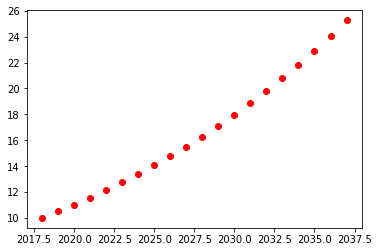

In [154]:
year = 2018 # starting year
window = 20  # looking 20 years ahead
demand = 10 # demand at t=0
rate = 1.05 # growth rate

trendestimate = estimate_trend(year, window, demand, rate)
t, d = trendestimate.linear(year, window, demand, rate)
trendestimate.print(t, d)
trendestimate.plot(t, d)

[2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037]
[10, 9.91860886117079, 10.269254235483325, 9.117370546293849, 8.077808363304193, 8.081644799418555, 6.831268856755529, 6.200840254944751, 5.280208779967273, 4.874560578013484, 4.5302281744198885, 4.409893547969094, 4.743209864997375, 5.529625348401055, 6.347062877520491, 7.496781641090811, 8.167274932770669, 7.806008157015044, 7.540256693319857, 6.278730126938661]


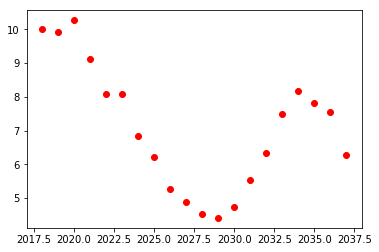

In [166]:
np.random.seed(seed=None)

year = 2018 # starting year
window = 20  # looking 20 years ahead
demand = 10 # demand at t=0
rate = 1 # growth rate
mu, sigma = 0, 0.1 # mean and standard deviation

trendestimate = estimate_trend(year, window, demand, rate)
t, d = trendestimate.random(year, window, demand, rate, mu, sigma)
trendestimate.print(t, d)
trendestimate.plot(t, d)